In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [15]:
plt.style.use('dark_background')

In [8]:
df_train = pd.read_csv('./files/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_train.shape

(1460, 81)

In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

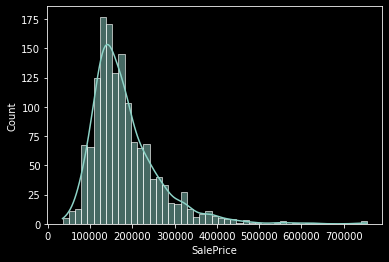

In [18]:
sns.histplot(x=df_train['SalePrice'], kde=True)
plt.show()

In [19]:
print("Skrewness %f" %df_train['SalePrice'].skew())
print('Kurtosis %f' %df_train['SalePrice'].kurt())

Skrewness 1.882876
Kurtosis 6.536282


In [44]:
columns = pd.Series(df_train.columns)

In [56]:
with open('./files/data_description.txt') as file:
    details = []
    for line in file.readlines():
        if ':' in line:
            line_split = line.split(':')
            column_name = line_split[0].strip()
            
            if '.5' in column_name:
                continue
                
            column_detail = line.split(':')[1].strip()
            
            details.append([column_name, column_detail])


In [60]:
pd.DataFrame(details, columns=['Columns', 'Description'])

,Columns,Description
0,MSSubClass,Identifies the type of dwelling involved in th...
1,MSZoning,Identifies the general zoning classification o...
2,LotFrontage,Linear feet of street connected to property
3,LotArea,Lot size in square feet
4,Street,Type of road access to property
...,...,...
74,MiscVal,$Value of miscellaneous feature
75,MoSold,Month Sold (MM)
76,YrSold,Year Sold (YYYY)
77,SaleType,Type of sale


In [46]:
pd.concat([columns, details], axis=1, keys=['Column', 'Details'])

,Column,Details
0,Id,Identifies the type of dwelling involved in th...
1,MSSubClass,Identifies the general zoning classification o...
2,MSZoning,Linear feet of street connected to property
3,LotFrontage,Lot size in square feet
4,LotArea,Type of road access to property
...,...,...
78,SaleType,$Value of miscellaneous feature
79,SaleCondition,Month Sold (MM)
80,SalePrice,Year Sold (YYYY)
81,NaN,Type of sale
